In [1]:
import numpy as np
np.random.seed(42)

embeddings = np.random.randn(1000, 2)
embeddings = embeddings / np.sqrt((embeddings**2).sum(1, keepdims=True))
embeddings = np.concatenate((embeddings, np.zeros((1000, 1))), axis=1)

query = np.array([0, -np.sqrt(2)/2, np.sqrt(2)/2])

In [2]:
similarities = embeddings.dot(query)

In [3]:
from sklearn import svm

# create the "Dataset"
x = np.concatenate([query[None,...], embeddings]) # x is (1001, 1536) array, with query now as the first row
y = np.zeros(1001)
y[0] = 1 # we have a single positive example, mark it as such

# train our (Exemplar) SVM
# docs: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
clf = svm.LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-6, C=0.1)
_ = clf.fit(x, y) # train

In [4]:
phi = np.linspace(0, np.pi, 200)
theta = np.linspace(0, 2*np.pi, 200)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

In [5]:
cosine_similarities = query[0]*x + query[1]*y + query[2]*z
min_value, max_value = np.min(cosine_similarities), np.max(cosine_similarities)
cosine_similarities = (cosine_similarities - min_value)/(max_value - min_value)

In [6]:
svc_score = clf.decision_function(
    np.concatenate(
        (
            x.reshape((40000, 1)),
            y.reshape((40000, 1)),
            z.reshape((40000, 1))
        ),
        axis=1
    )
).reshape((200, 200))

min_value, max_value = np.min(svc_score), np.max(svc_score)
svc_score = (svc_score - min_value)/(max_value - min_value)

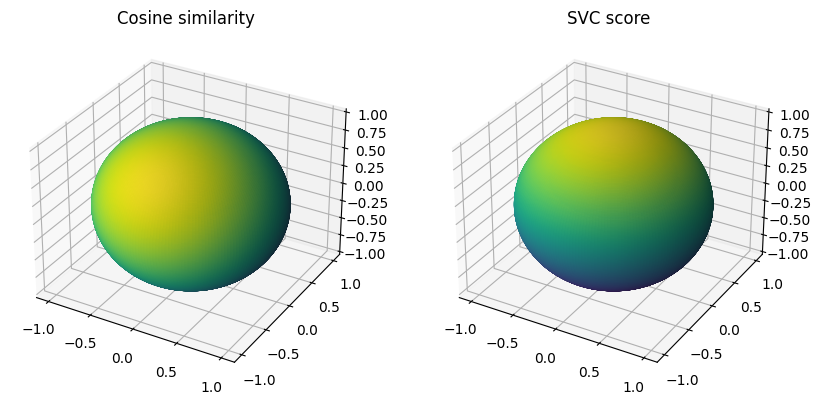

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.viridis(cosine_similarities))
ax.set_title("Cosine similarity")
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.viridis(svc_score))
ax.set_title("SVC score")
plt.show()